<a href="https://colab.research.google.com/github/pranamyasin/projects/blob/main/USmacroeconomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

##IMPORT

In [51]:
data = pd.read_csv("/content/drive/MyDrive/collab/US_macroeconomics.csv")
data.head()

,date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings
0,01-11-1980,85.6,14.2050,7.5,200.685556,4976.5,1826.8,11.6
1,01-12-1980,86.4,14.7900,7.2,198.398636,4999.8,1851.7,11.4
2,01-01-1981,87.2,14.9040,7.5,198.817619,4980.4,1870.0,10.9
3,01-02-1981,88.0,15.1325,7.4,194.852105,4965.0,1884.2,10.8
4,01-03-1981,88.6,15.4000,7.4,203.593182,4979.0,1902.9,10.8


##Data Analysis


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              499 non-null    object 
 1   CPI                               499 non-null    float64
 2   Mortgage_rate                     499 non-null    float64
 3   Unemp_rate                        499 non-null    float64
 4   NASDAQ                            499 non-null    float64
 5   disposable_income                 499 non-null    float64
 6   Personal_consumption_expenditure  499 non-null    float64
 7   personal_savings                  499 non-null    float64
dtypes: float64(7), object(1)
memory usage: 31.3+ KB


In [53]:
data.describe()

,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,178.774886,7.420819,6.180962,2726.419046,9801.916633,7626.305812,7.486573
std,53.252920,3.454838,1.781931,3142.577570,3176.282199,4092.396137,3.015236
min,85.600000,2.684000,3.500000,167.382727,4965.000000,1826.800000,2.100000
25%,134.950000,4.518750,4.900000,479.524773,6861.450000,3910.050000,5.850000
50%,177.400000,6.834000,5.700000,1884.730952,9733.900000,7082.300000,7.200000
75%,227.532500,9.337500,7.250000,3131.357982,12226.100000,10857.300000,8.600000
max,291.474000,18.454000,14.700000,15814.932860,19119.500000,16954.500000,33.800000


In [54]:
print("min_date = " ,data['date'].min())
print("max_date = " ,data['date'].max())    #To know time lapse

min_date =  01-01-1981
max_date =  01-12-2021


In [55]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')                #To better understand the date

In [56]:
len(data['date'].value_counts())                                             #Total data to evaluate

499

In [57]:
#Estimating Null Values
data.isnull().sum()

,0
date,0
CPI,0
Mortgage_rate,0
Unemp_rate,0
NASDAQ,0
disposable_income,0
Personal_consumption_expenditure,0
personal_savings,0


In [58]:
#There is no missing values in the dataset

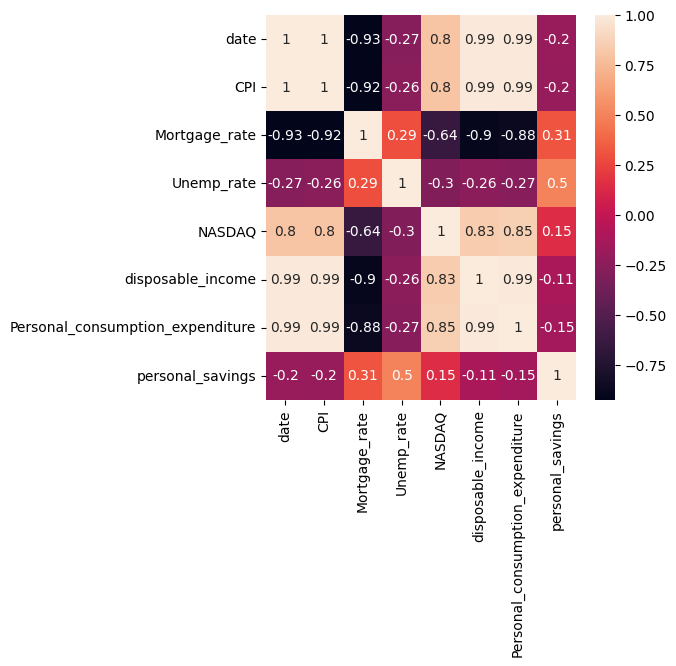

,date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings
date,1.000000,0.998312,-0.925378,-0.272997,0.798286,0.992167,0.989746,-0.195491
CPI,0.998312,1.000000,-0.919183,-0.262923,0.803369,0.989534,0.991096,-0.199462
Mortgage_rate,-0.925378,-0.919183,1.000000,0.289959,-0.642176,-0.895327,-0.877437,0.311006
Unemp_rate,-0.272997,-0.262923,0.289959,1.000000,-0.295089,-0.255670,-0.267502,0.500766
NASDAQ,0.798286,0.803369,-0.642176,-0.295089,1.000000,0.834571,0.849986,0.147788
disposable_income,0.992167,0.989534,-0.895327,-0.255670,0.834571,1.000000,0.991573,-0.112388
Personal_consumption_expenditure,0.989746,0.991096,-0.877437,-0.267502,0.849986,0.991573,1.000000,-0.147267
personal_savings,-0.195491,-0.199462,0.311006,0.500766,0.147788,-0.112388,-0.147267,1.000000


In [59]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True)
plt.show()
data.corr()

####CORRELATION
##### Date and CPI has been highly related followed by diposable income, personal consumption expenditure and NASDAQ
##### Morgage rate and Unemplyment rate has least or no relation with any variable

##Data Visualization

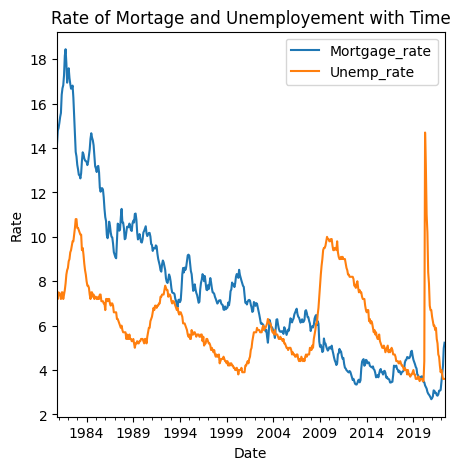

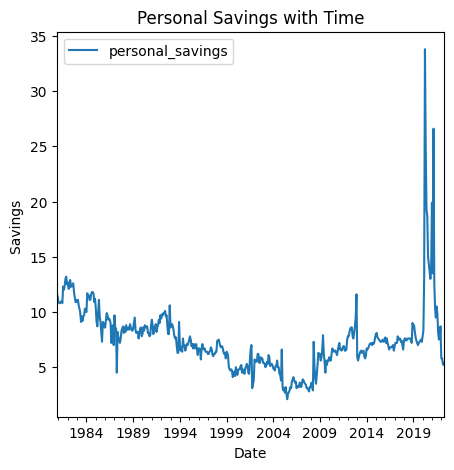

In [60]:
#Understanding Mortgage rate and Unemployment with with help of graph


data.plot(x='date', y=['Mortgage_rate', 'Unemp_rate'], figsize=(5,5))
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Rate of Mortage and Unemployement with Time')

#Undersatnding personal savings with time

data.plot(x='date', y=['personal_savings'], figsize=(5,5))
plt.xlabel('Date')
plt.ylabel('Savings ')
plt.title('Personal Savings with Time')
plt.show()

#####Overall, Mortagage Rate, Unemployement rate and Personal Savings has decreased by the end of 2019 comparing it with 1984
#####There was a spike increase in unemployment rate during 2019 at the same time personal savings of individuals also increased --This is means during the unemployement phase the population started utilising their assets for the sustainance


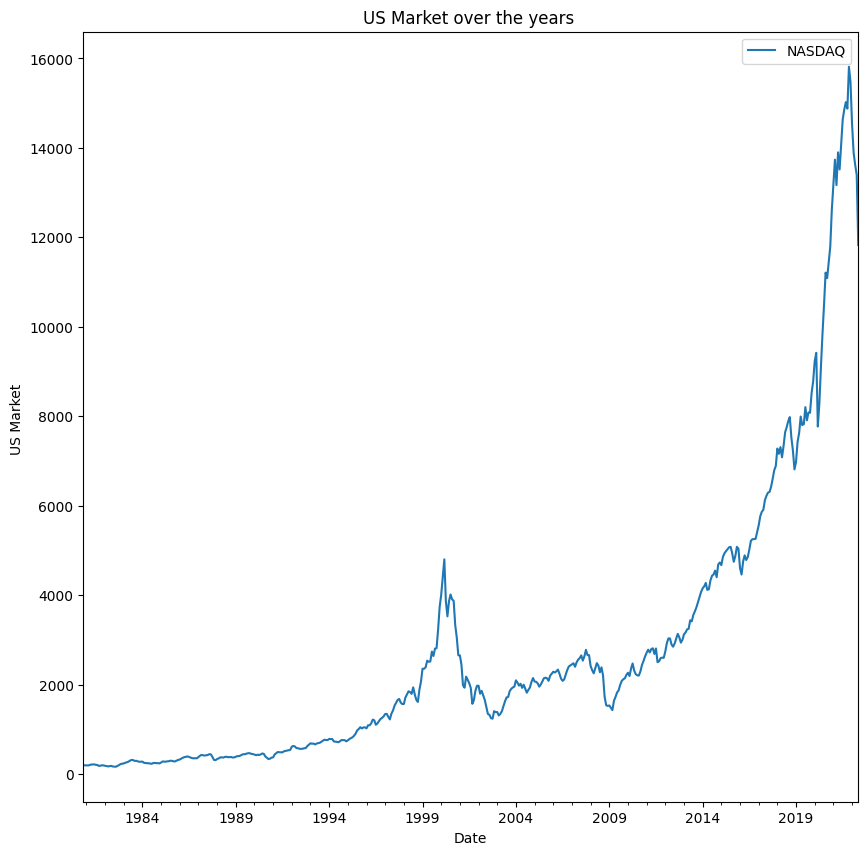

In [61]:
#Understatnding Changes in US market over time
#Undersatnding personal savings with time

data.plot(x='date', y=['NASDAQ'], figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('US Market ')
plt.title('US Market over the years ')
plt.show()

#####Overall US market has increased over time. However there was slight decrease towards the end of 2019